In [22]:

import subprocess
import sys
import os
from IPython.display import Image, display, Markdown

# Add the project root to the system path to ensure scripts can find config and utils
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
print(f"Project Root added to path: {project_root}")

# Helper function to run scripts and display their output in real-time
def run_script(script_path):
    """Executes a python script and prints its output in real-time."""
    script_name = os.path.basename(script_path)
    display(Markdown(f"### ▶️ **Running Script: `{script_name}`**"))
    
    process = subprocess.Popen(
        [sys.executable, script_path],
        stdout=subprocess.PIPE, stderr=subprocess.STDOUT,
        text=True, encoding='utf-8', errors='replace'
    )

    # Stream the output
    while True:
        output = process.stdout.readline()
        if output == '' and process.poll() is not None:
            break
        if output:
            print(output.strip())
            
    if process.returncode != 0:
        display(Markdown(f"<p style='color:red;font-weight:bold;'>❌ ERROR: Script `{script_name}` failed.</p>"))
        return False
    else:
        display(Markdown(f"<p style='color:green;font-weight:bold;'>✅ SUCCESS: Script `{script_name}` finished.</p>"))
        return True

Project Root added to path: /home/fentahun/10 acadamy/fin-tec week2/fintech_reviews_omega_week2


In [23]:
# Cell 2: Prerequisite Check
# Verify that the necessary input file from Task 2 exists.

import config 

analyzed_file_path = os.path.join(config.PROCESSED_DATA_DIR, "all_banks_reviews_analyzed.csv")

display(Markdown("### **1. Prerequisite Check**"))
if os.path.exists(analyzed_file_path):
    display(Markdown(f"✅ Found analyzed data file: `{analyzed_file_path}`"))
    prereq_met = True
else:
    display(Markdown(f"❌ **CRITICAL ERROR:** Analyzed data file not found at `{analyzed_file_path}`."))
    display(Markdown("Please run `scripts/analysis.py` before proceeding."))
    prereq_met = False

### **1. Prerequisite Check**

✅ Found analyzed data file: `data/processed/all_banks_reviews_analyzed.csv`

In [24]:
# Cell 3: Run the Database Loader Script

if prereq_met:
    display(Markdown("---"))
    display(Markdown("## **Task 3: Loading Data into PostgreSQL**"))
    db_loader_script = os.path.join(project_root, 'src', 'data_collection','db_loader.py')
    run_script(db_loader_script)
else:
    display(Markdown("<p style='color:orange;font-weight:bold;'>Skipping Task 3 due to missing prerequisite file.</p>"))

---

## **Task 3: Loading Data into PostgreSQL**

### ▶️ **Running Script: `db_loader.py`**

--- Starting Robust Database Loading Process (Task 3) ---
Loaded 5413 analyzed reviews from CSV.
✅ PostgreSQL database connection successful!
Populating BANKS table...

Preparing to insert 5413 reviews into REVIEWS table...

✅ Transaction committed. 0 new records were inserted into the REVIEWS table.
✅ KPI Met: Working connection + insert script is implemented.

Database connection closed.


<p style='color:green;font-weight:bold;'>✅ SUCCESS: Script `db_loader.py` finished.</p>

In [25]:
# Cell 4: Run the Reporting Script

if prereq_met:
    display(Markdown("---"))
    display(Markdown("## **Task 4: Generating Reports and Visualizations**"))
    reporting_script = os.path.join(project_root, 'src', 'data_collection', 'reporting.py')
    run_script(reporting_script)
else:
    display(Markdown("<p style='color:orange;font-weight:bold;'>Skipping Task 4 due to missing prerequisite file.</p>"))

---

## **Task 4: Generating Reports and Visualizations**

### ▶️ **Running Script: `reporting.py`**

--- Starting Reporting & Visualization Process (Task 4) ---

Generating plots...
/home/fentahun/10 acadamy/fin-tec week2/fintech_reviews_omega_week2/utils/plotting_utils.py:37: FutureWarning:

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

sns.barplot(x=top_themes.values, y=top_themes.index, palette=palette)
/home/fentahun/10 acadamy/fin-tec week2/fintech_reviews_omega_week2/utils/plotting_utils.py:37: FutureWarning:

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

sns.barplot(x=top_themes.values, y=top_themes.index, palette=palette)
✅ All visualizations have been saved to the '/home/fentahun/10 acadamy/fin-tec week2/fintech_reviews_omega_week2/visualizations/' directory.

--- Key Insights & Recommendations (Task 4) ---

Pain Point 1: Bank of Abyssinia 

<p style='color:green;font-weight:bold;'>✅ SUCCESS: Script `reporting.py` finished.</p>

---

## **Final Report Visualizations**

### Sentiment Distribution By Bank

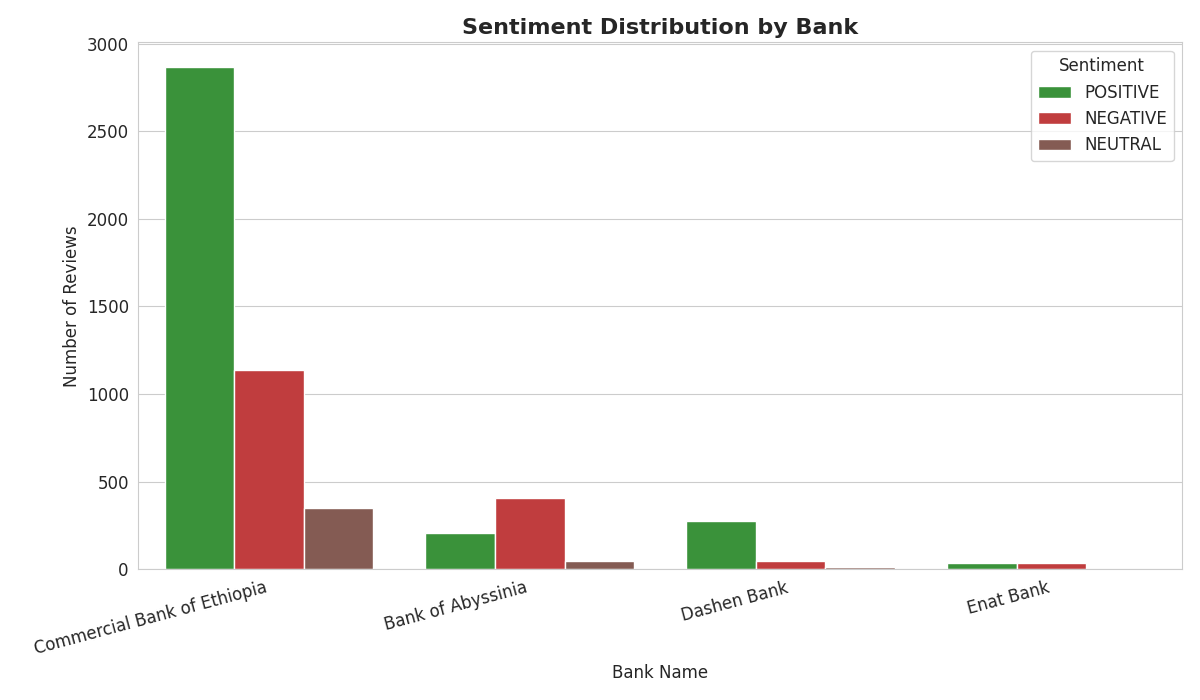

### Top Pain Points

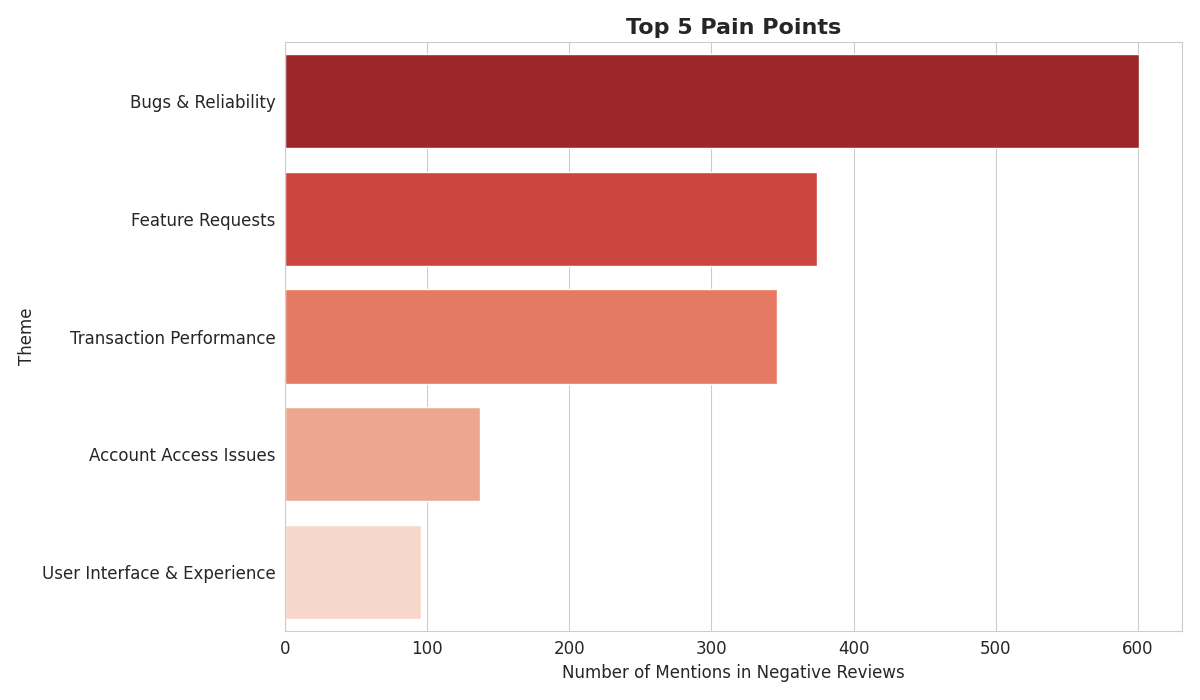

### Top Satisfaction Drivers

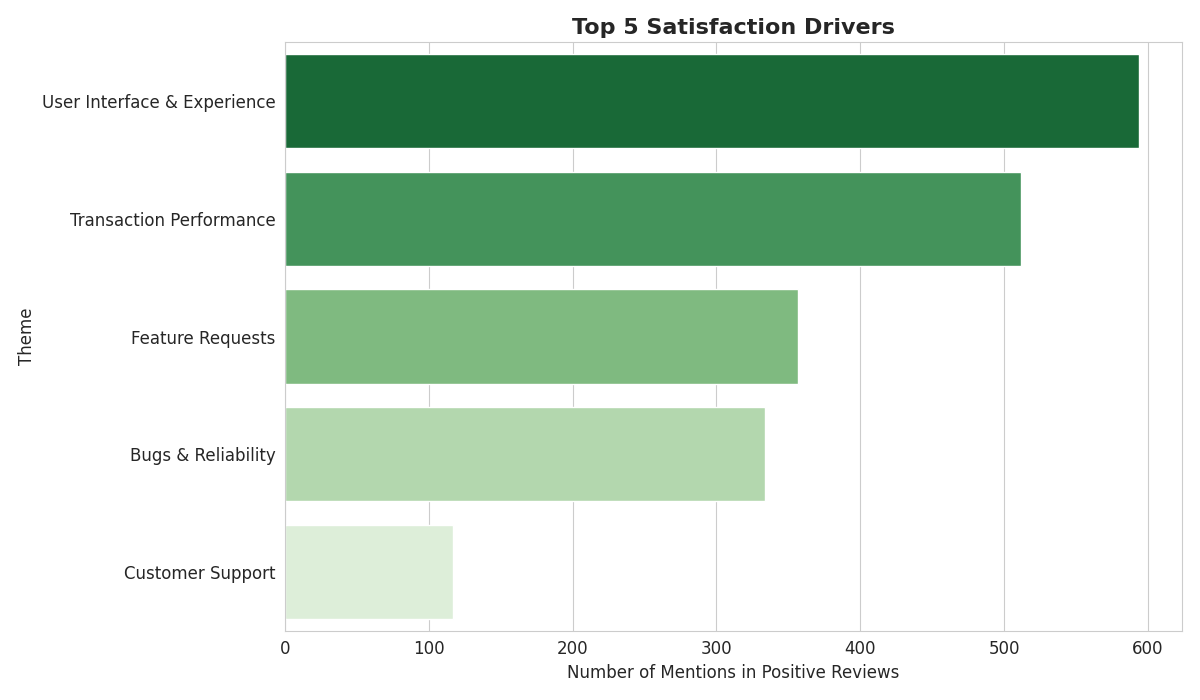

### Wordcloud Bank Of Abyssinia

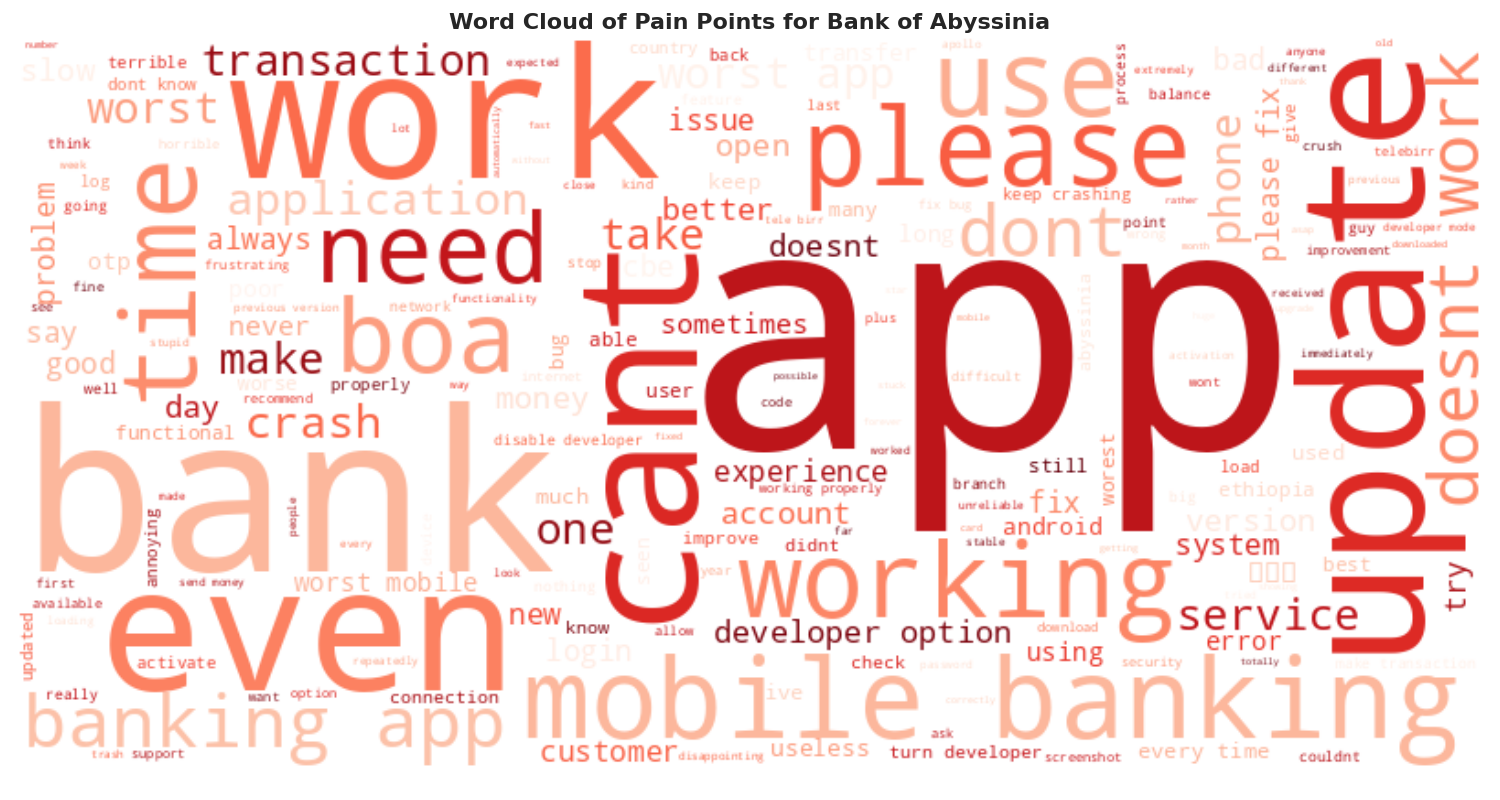

In [26]:
# Cell 5: Display Generated Visualizations
# This final cell provides a visual confirmation by displaying the plots saved by the reporting script.

if prereq_met:
    viz_dir = os.path.join(project_root, config.VISUALIZATIONS_DIR)
    
    display(Markdown("---"))
    display(Markdown("## **Final Report Visualizations**"))

    if os.path.exists(viz_dir):
        # Sort files to display them in a logical order
        image_files = sorted([f for f in os.listdir(viz_dir) if f.endswith('.png')])
        
        if not image_files:
            display(Markdown("<p style='color:orange;'>No .png files found in the visualizations directory.</p>"))
        else:
            for img_file in image_files:
                # Format a nice title from the filename
                title = os.path.splitext(img_file)[0][2:].replace('_', ' ').title()
                display(Markdown(f"### {title}"))
                # Display the image, ensuring it fits the notebook width
                display(Image(filename=os.path.join(viz_dir, img_file), width=800))
    else:
        display(Markdown(f"<p style='color:red;'>Visualization directory not found at: `{viz_dir}`</p>"))